<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/TheValley/Arboles/Clase_02_Arboles/02_A_%C3%81rboles_Clasificaci%C3%B3n_M%C3%BAltiple_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRO: Árboles de Decisión
Explicación de cómo construír árboles de decisión de **clasificación multiclase**.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1kiEbdMHy7Ji02SlTxzq913bZ-rcQWn00Td0K_MNVXEk/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_01_Arboles/01_%C3%81rboles_Decisi%C3%B3n_Clasificaci%C3%B3n_Resuelto.ipynb)




## 0101 Qué es un árbol de decisión?
Un tipo de algoritmo de aprendizaje supervisado que se basa en realizar particiones a partir de distintos niveles de las variables disponibles.

## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset: salud del feto
Para probar a hacer árboles de decisión de clasificación multiclas utilizaremos un dataset sobre el estado de salud de un feto que he encontrado en Kaggle ([aquí](https://www.kaggle.com/andrewmvd/fetal-health-classification)). 

Podéis encontrar el archivo listo para importar en mi github: 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/fetal_health.csv'. 

Importa este dataset en un dataframe llamado **df**.

In [123]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/fetal_health.csv'

# Importa csv
df = pd.read_csv(url)

# Visualización primeras filas
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# 02 EDA
Realizaremos un pequeño análisis exploratorio visual para familiarizarnos con el dataset. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [125]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


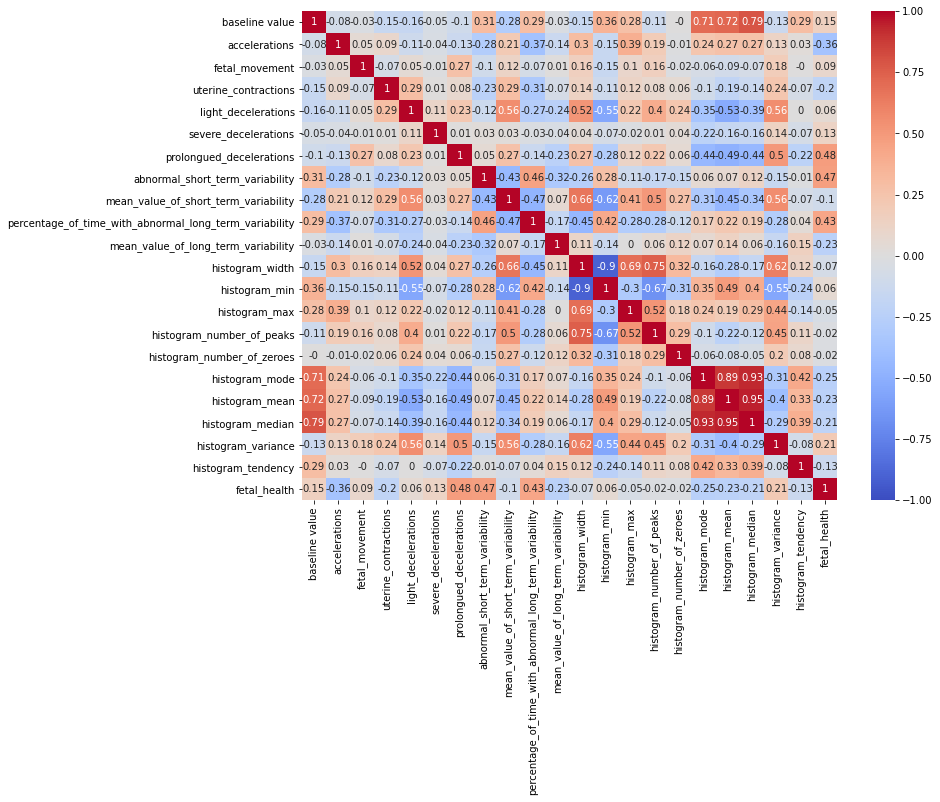

In [126]:
# Visualización coeficientes Pearson
plt.figure(figsize=(12,9))
sns.heatmap(np.round(df.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 03 Construcción árbol de decisión a mano
Nunca lo haremos en la vida real, pero para afianzar el entendimiento de este tipo de algoritmos, vamos a reproducir el proceso de entrenamiento a mano.

## 0301 DataFrame
Para simplificar, haremos esto con un dataframe consistente solo en las columnas ['baseline value', 'accelerations', 'fetal_movement', 'fetal_health'] renombradas como ['Base', 'Acc', 'Mov', 'Salud Feto'].

In [138]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [139]:
df_resumen = df[['baseline value', 'accelerations', 'fetal_movement', 'fetal_health']]
df_resumen.columns = ['Base', 'Acc', 'Mov', 'Salud Feto']
df_resumen.head(7)

,Base,Acc,Mov,Salud Feto
0,120.0,0.000,0.0,2.0
1,132.0,0.006,0.0,1.0
2,133.0,0.003,0.0,1.0
3,134.0,0.003,0.0,1.0
4,132.0,0.007,0.0,1.0
5,134.0,0.001,0.0,3.0
6,134.0,0.001,0.0,3.0


## 0301 Seleccionamos el nodo raíz
Para seleccionar el nodo raíz generaremos árboles muy sencillos, de solo 3 nodos (una sola partición).

### 030101 Variable categórica
En este dataset resumen no tenemos una variable categórica binaria, pero generamos una a partir de una partición sobre una variable continua (por ejemplo Base > 132).

A partir de esa nueva variable categórica binaria probamos a generar una partición.

In [153]:
df_resumen_i = df_resumen.copy(deep=True)
filtro_i = df_resumen_i['Base'] > 132
df_resumen_i['base > 132'] = filtro_i.astype(int)
df_resumen_i.head()

,Base,Acc,Mov,Salud Feto,base > 132
0,120.0,0.000,0.0,2.0,0
1,132.0,0.006,0.0,1.0,0
2,133.0,0.003,0.0,1.0,1
3,134.0,0.003,0.0,1.0,1
4,132.0,0.007,0.0,1.0,0


In [154]:
# Podemos hacer la partición Anemia = 1 y Anemia = 0 con un groupby
df_i = df_resumen_i.groupby(['base > 132','Salud Feto'])['Base'].agg(['count']).reset_index()
df_i

,base > 132,Salud Feto,count
0,0,1.0,859
1,0,2.0,37
2,0,3.0,91
3,1,1.0,796
4,1,2.0,258
5,1,3.0,85


In [155]:
def particion_categorica(df, target, var_discreta):
  """
  Genera un dataframe con información sobre la partición utilizando la variable
  discreta binaria aportada.
  """
  df_i = df.groupby([var_discreta,target])[df.columns[0]].agg(['count']).reset_index()
  
  return df_i.sort_values(var_discreta, ascending=True).reset_index(drop=True)

### 030102 Variable Continua
Las variables continuas pueden dar lugar a diversas particiones. Veamos la variable 'Base' como ejemplo.

In [156]:
def particiones_continuas(df, target, var_continua):
  """
  Muestra una serie dataframes con información sobre las distintas particiones 
  posibles utilizando la variable continua aportada.
  """
  valores_unicos_ordenados = df[var_continua].sort_values().unique()
  valores_particiones = (valores_unicos_ordenados[:-1] + 
                         valores_unicos_ordenados[1:])/2

  for valor in valores_particiones:
    df_i = df.copy(deep=True)
    filtro_i = df_i[var_continua] > valor
    df_i[str(var_continua) + ' > ' + str(valor)] = filtro_i.astype(int)
    df_i = particion_categorica(df_i, 
                                target, 
                                str(var_continua) + ' > ' + str(valor))
    display(df_i)

In [157]:
particiones_continuas(df_resumen, 'Salud Feto', 'Base')

,Base > 108.0,Salud Feto,count
0,0,1.0,7
1,1,1.0,1648
2,1,2.0,295
3,1,3.0,176


,Base > 111.0,Salud Feto,count
0,0,1.0,22
1,0,3.0,6
2,1,1.0,1633
3,1,2.0,295
4,1,3.0,170


,Base > 113.0,Salud Feto,count
0,0,1.0,38
1,0,3.0,6
2,1,1.0,1617
3,1,2.0,295
4,1,3.0,170


,Base > 114.5,Salud Feto,count
0,0,1.0,49
1,0,3.0,6
2,1,1.0,1606
3,1,2.0,295
4,1,3.0,170


,Base > 115.5,Salud Feto,count
0,0,1.0,77
1,0,3.0,6
2,1,1.0,1578
3,1,2.0,295
4,1,3.0,170


,Base > 116.5,Salud Feto,count
0,0,1.0,82
1,0,3.0,6
2,1,1.0,1573
3,1,2.0,295
4,1,3.0,170


,Base > 117.5,Salud Feto,count
0,0,1.0,84
1,0,3.0,6
2,1,1.0,1571
3,1,2.0,295
4,1,3.0,170


,Base > 118.5,Salud Feto,count
0,0,1.0,93
1,0,3.0,6
2,1,1.0,1562
3,1,2.0,295
4,1,3.0,170


,Base > 119.5,Salud Feto,count
0,0,1.0,110
1,0,3.0,6
2,1,1.0,1545
3,1,2.0,295
4,1,3.0,170


,Base > 120.5,Salud Feto,count
0,0,1.0,170
1,0,2.0,2
2,0,3.0,22
3,1,1.0,1485
4,1,2.0,293
5,1,3.0,154


,Base > 121.5,Salud Feto,count
0,0,1.0,207
1,0,2.0,3
2,0,3.0,28
3,1,1.0,1448
4,1,2.0,292
5,1,3.0,148


,Base > 122.5,Salud Feto,count
0,0,1.0,313
1,0,2.0,3
2,0,3.0,31
3,1,1.0,1342
4,1,2.0,292
5,1,3.0,145


,Base > 123.5,Salud Feto,count
0,0,1.0,354
1,0,2.0,10
2,0,3.0,39
3,1,1.0,1301
4,1,2.0,285
5,1,3.0,137


,Base > 124.5,Salud Feto,count
0,0,1.0,361
1,0,2.0,10
2,0,3.0,42
3,1,1.0,1294
4,1,2.0,285
5,1,3.0,134


,Base > 125.5,Salud Feto,count
0,0,1.0,447
1,0,2.0,14
2,0,3.0,43
3,1,1.0,1208
4,1,2.0,281
5,1,3.0,133


,Base > 126.5,Salud Feto,count
0,0,1.0,485
1,0,2.0,14
2,0,3.0,43
3,1,1.0,1170
4,1,2.0,281
5,1,3.0,133


,Base > 127.5,Salud Feto,count
0,0,1.0,543
1,0,2.0,16
2,0,3.0,43
3,1,1.0,1112
4,1,2.0,279
5,1,3.0,133


,Base > 128.5,Salud Feto,count
0,0,1.0,608
1,0,2.0,23
2,0,3.0,56
3,1,1.0,1047
4,1,2.0,272
5,1,3.0,120


,Base > 129.5,Salud Feto,count
0,0,1.0,649
1,0,2.0,27
2,0,3.0,68
3,1,1.0,1006
4,1,2.0,268
5,1,3.0,108


,Base > 130.5,Salud Feto,count
0,0,1.0,742
1,0,2.0,32
2,0,3.0,81
3,1,1.0,913
4,1,2.0,263
5,1,3.0,95


,Base > 131.5,Salud Feto,count
0,0,1.0,792
1,0,2.0,33
2,0,3.0,86
3,1,1.0,863
4,1,2.0,262
5,1,3.0,90


,Base > 132.5,Salud Feto,count
0,0,1.0,859
1,0,2.0,37
2,0,3.0,91
3,1,1.0,796
4,1,2.0,258
5,1,3.0,85


,Base > 133.5,Salud Feto,count
0,0,1.0,958
1,0,2.0,48
2,0,3.0,117
3,1,1.0,697
4,1,2.0,247
5,1,3.0,59


,Base > 134.5,Salud Feto,count
0,0,1.0,1008
1,0,2.0,49
2,0,3.0,133
3,1,1.0,647
4,1,2.0,246
5,1,3.0,43


,Base > 135.5,Salud Feto,count
0,0,1.0,1060
1,0,2.0,56
2,0,3.0,139
3,1,1.0,595
4,1,2.0,239
5,1,3.0,37


,Base > 136.5,Salud Feto,count
0,0,1.0,1129
1,0,2.0,58
2,0,3.0,140
3,1,1.0,526
4,1,2.0,237
5,1,3.0,36


,Base > 137.5,Salud Feto,count
0,0,1.0,1170
1,0,2.0,75
2,0,3.0,141
3,1,1.0,485
4,1,2.0,220
5,1,3.0,35


,Base > 138.5,Salud Feto,count
0,0,1.0,1249
1,0,2.0,95
2,0,3.0,145
3,1,1.0,406
4,1,2.0,200
5,1,3.0,31


,Base > 139.5,Salud Feto,count
0,0,1.0,1278
1,0,2.0,105
2,0,3.0,145
3,1,1.0,377
4,1,2.0,190
5,1,3.0,31


,Base > 140.5,Salud Feto,count
0,0,1.0,1334
1,0,2.0,116
2,0,3.0,148
3,1,1.0,321
4,1,2.0,179
5,1,3.0,28


,Base > 141.5,Salud Feto,count
0,0,1.0,1358
1,0,2.0,130
2,0,3.0,149
3,1,1.0,297
4,1,2.0,165
5,1,3.0,27


,Base > 142.5,Salud Feto,count
0,0,1.0,1425
1,0,2.0,140
2,0,3.0,149
3,1,1.0,230
4,1,2.0,155
5,1,3.0,27


,Base > 143.5,Salud Feto,count
0,0,1.0,1465
1,0,2.0,156
2,0,3.0,149
3,1,1.0,190
4,1,2.0,139
5,1,3.0,27


,Base > 144.5,Salud Feto,count
0,0,1.0,1513
1,0,2.0,181
2,0,3.0,153
3,1,1.0,142
4,1,2.0,114
5,1,3.0,23


,Base > 145.5,Salud Feto,count
0,0,1.0,1534
1,0,2.0,197
2,0,3.0,153
3,1,1.0,121
4,1,2.0,98
5,1,3.0,23


,Base > 146.5,Salud Feto,count
0,0,1.0,1571
1,0,2.0,220
2,0,3.0,155
3,1,1.0,84
4,1,2.0,75
5,1,3.0,21


,Base > 147.5,Salud Feto,count
0,0,1.0,1581
1,0,2.0,224
2,0,3.0,155
3,1,1.0,74
4,1,2.0,71
5,1,3.0,21


,Base > 148.5,Salud Feto,count
0,0,1.0,1606
1,0,2.0,243
2,0,3.0,163
3,1,1.0,49
4,1,2.0,52
5,1,3.0,13


,Base > 149.5,Salud Feto,count
0,0,1.0,1616
1,0,2.0,251
2,0,3.0,163
3,1,1.0,39
4,1,2.0,44
5,1,3.0,13


,Base > 150.5,Salud Feto,count
0,0,1.0,1619
1,0,2.0,266
2,0,3.0,171
3,1,1.0,36
4,1,2.0,29
5,1,3.0,5


,Base > 151.5,Salud Feto,count
0,0,1.0,1621
1,0,2.0,275
2,0,3.0,174
3,1,1.0,34
4,1,2.0,20
5,1,3.0,2


,Base > 153.0,Salud Feto,count
0,0,1.0,1628
1,0,2.0,283
2,0,3.0,176
3,1,1.0,27
4,1,2.0,12


,Base > 155.0,Salud Feto,count
0,0,1.0,1633
1,0,2.0,286
2,0,3.0,176
3,1,1.0,22
4,1,2.0,9


,Base > 156.5,Salud Feto,count
0,0,1.0,1636
1,0,2.0,287
2,0,3.0,176
3,1,1.0,19
4,1,2.0,8


,Base > 157.5,Salud Feto,count
0,0,1.0,1640
1,0,2.0,287
2,0,3.0,176
3,1,1.0,15
4,1,2.0,8


,Base > 158.5,Salud Feto,count
0,0,1.0,1650
1,0,2.0,287
2,0,3.0,176
3,1,1.0,5
4,1,2.0,8


,Base > 159.5,Salud Feto,count
0,0,1.0,1654
1,0,2.0,295
2,0,3.0,176
3,1,1.0,1


### 030103 Impureza de Gini
Calculamos la impureza de Gini de cada una de las particiones.

In [158]:
df_i

,base > 132,Salud Feto,count
0,0,1.0,859
1,0,2.0,37
2,0,3.0,91
3,1,1.0,796
4,1,2.0,258
5,1,3.0,85


In [159]:
def gini(df_i):
  """
  Calcula el Gini para cada nodo el ponderado de la decisión.
  """
  for nodo in [0, 1]:
    gini = 1
    filtro_condicion = df_i[df_i.columns[0]]==nodo
    for clase in df_i.loc[filtro_condicion, df_i.columns[1]]:
      conteo_i = int(df_i.loc[((filtro_condicion)&(df_i[df_i.columns[1]]==clase)), 'count'])
      prob_i = conteo_i/df_i.loc[filtro_condicion, 'count'].sum()
      gini = gini - prob_i**2
    
    df_i.loc[filtro_condicion,'Gini'] = gini
  
  df_i_group = df_i.groupby([df_i.columns[0], 'Gini'])['count'].agg('sum').reset_index()
  gini_pond = (df_i_group['count'][0] * df_i_group['Gini'][0] +  
               df_i_group['count'][1] * df_i_group['Gini'][1])/(df_i_group['count'].sum())
  
  df_i['Gini Media Pond'] = gini_pond
  return df_i

In [160]:
gini(df_i)

,base > 132,Salud Feto,count,Gini,Gini Media Pond
0,0,1.0,859,0.232648,0.351622
1,0,2.0,37,0.232648,0.351622
2,0,3.0,91,0.232648,0.351622
3,1,1.0,796,0.454719,0.351622
4,1,2.0,258,0.454719,0.351622
5,1,3.0,85,0.454719,0.351622


In [161]:
def particion_categorica(df, target, var_discreta):
  """
  Genera un dataframe con información sobre la partición utilizando la variable
  discreta binaria aportada.
  """
  df_i = df.groupby([var_discreta,target])[df_resumen_i.columns[0]].agg(['count']).reset_index()
  df_i = df_i.sort_values(var_discreta, ascending=True).reset_index(drop=True)
  return gini(df_i)

### 030104 Cuál es la mejor partición?

In [163]:
def mejor_particion_continua(df, target, var_continua):
  """
  Devuelve un dataframe con información sobre la partición ópitma de entre las 
  posibles utilizando la variable continua aportada.
  """
  valores_unicos_ordenados = df[var_continua].sort_values().unique()
  valores_particiones = (valores_unicos_ordenados[:-1] + 
                         valores_unicos_ordenados[1:])/2
  particion_optima = []

  for i, valor in enumerate(valores_particiones):
    df_i = df.copy(deep=True)
    filtro_i = df_i[var_continua] > valor
    df_i[str(var_continua) + ' > ' + str(valor)] = filtro_i.astype(int)
    df_i = particion_categorica(df_i, 
                                target, 
                                str(var_continua) + ' > ' + str(valor))

    if i == 0:
      particion_optima = df_i
    else:
      if df_i['Gini Media Pond'][0] < particion_optima['Gini Media Pond'][0]:
        particion_optima = df_i
    
  return particion_optima

In [164]:
mejor_particion_continua(df_resumen, 'Salud Feto', 'Base')

,Base > 142.5,Salud Feto,count,Gini,Gini Media Pond
0,0,1.0,1425,0.294564,0.342617
1,0,2.0,140,0.294564,0.342617
2,0,3.0,149,0.294564,0.342617
3,1,1.0,230,0.542523,0.342617
4,1,2.0,155,0.542523,0.342617
5,1,3.0,27,0.542523,0.342617


In [165]:
mejor_particion_continua(df_resumen, 'Salud Feto', 'Acc')

,Acc > 0.0005,Salud Feto,count,Gini,Gini Media Pond
0,0,1.0,499,0.584205,0.313802
1,0,2.0,249,0.584205,0.313802
2,0,3.0,146,0.584205,0.313802
3,1,1.0,1156,0.117584,0.313802
4,1,2.0,46,0.117584,0.313802
5,1,3.0,30,0.117584,0.313802


In [166]:
mejor_particion_continua(df_resumen, 'Salud Feto', 'Mov')

,Mov > 0.0015,Salud Feto,count,Gini,Gini Media Pond
0,0,1.0,1196,0.323837,0.364043
1,0,2.0,169,0.323837,0.364043
2,0,3.0,110,0.323837,0.364043
3,1,1.0,459,0.455138,0.364043
4,1,2.0,126,0.455138,0.364043
5,1,3.0,66,0.455138,0.364043


In [167]:
def seleccion_particion(df, target, lista_vars_continuas, lista_vars_binarias):
  particion_optima = []

  for i, var in enumerate(lista_vars_continuas+lista_vars_binarias):
    if var in lista_vars_continuas:
      df_i = mejor_particion_continua(df, target, var)
    if var in lista_vars_binarias:
      df_i = particion_categorica(df,  target, var)
    

    if i == 0:
      particion_optima = df_i
    else:
      if df_i['Gini Media Pond'][0] < particion_optima['Gini Media Pond'][0]:
        particion_optima = df_i
    
  return particion_optima

In [168]:
seleccion_particion(df_resumen, 'Salud Feto', ['Base', 'Acc', 'Mov'], [])

,Acc > 0.0005,Salud Feto,count,Gini,Gini Media Pond
0,0,1.0,499,0.584205,0.313802
1,0,2.0,249,0.584205,0.313802
2,0,3.0,146,0.584205,0.313802
3,1,1.0,1156,0.117584,0.313802
4,1,2.0,46,0.117584,0.313802
5,1,3.0,30,0.117584,0.313802


## 0302 Construímos las ramas
Vamos a contruír el resto del árbol sin repetir variables.

In [169]:
# Realizamos la partición
df_resumen_1 = df_resumen[df_resumen['Acc']>0.0005]
df_resumen_2 = df_resumen[df_resumen['Base']<0.0005]

In [170]:
df_resumen.columns

Index(['Base', 'Acc', 'Mov', 'Salud Feto'], dtype='object')

### 030201 Rama Izquierda (1)

In [171]:
# Siguiente partición
seleccion_particion(df_resumen_1, 'Salud Feto', ['Base', 'Acc', 'Mov'], [])

,Acc > 0.0025,Salud Feto,count,Gini,Gini Media Pond
0,0,1.0,245,0.325240,0.108771
1,0,2.0,40,0.325240,0.108771
2,0,3.0,18,0.325240,0.108771
3,1,1.0,911,0.038167,0.108771
4,1,2.0,6,0.038167,0.108771
5,1,3.0,12,0.038167,0.108771


In [172]:
# Realizamos la siguiente partición
df_resumen_1_1 = df_resumen[((df_resumen['Acc']>0.0005)&(df_resumen['Acc']>0.0025))]
df_resumen_1_2 = df_resumen[((df_resumen['Acc']>0.0005)&(df_resumen['Acc']<0.0025))]

In [174]:
# Siguiente partición
seleccion_particion(df_resumen_1_1, 'Salud Feto', ['Base', 'Acc', 'Mov'], [])

,Base > 111.0,Salud Feto,count,Gini,Gini Media Pond
0,0,1.0,14,0.387812,0.035618
1,0,3.0,5,0.387812,0.035618
2,1,1.0,897,0.028265,0.035618
3,1,2.0,6,0.028265,0.035618
4,1,3.0,7,0.028265,0.035618


In [173]:
# Siguiente partición
seleccion_particion(df_resumen_1_2, 'Salud Feto', ['Base', 'Acc', 'Mov'], [])

,Base > 136.5,Salud Feto,count,Gini,Gini Media Pond
0,0,1.0,154,0.240121,0.304441
1,0,2.0,6,0.240121,0.304441
2,0,3.0,18,0.240121,0.304441
3,1,1.0,91,0.396032,0.304441
4,1,2.0,34,0.396032,0.304441


# 04 Construcción árbol de decisión con scikit learn
Ahora de manera automática, utilizando la librería [scikit learn](https://scikit-learn.org/stable/), la libería básica de referencia para machine learning.

## 0401 Importamos las librerías

In [177]:
# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree

## 0402 Inicializamos el árbol
Definiendo las características que tendrá.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [178]:
# Inicializamos un árbol. Por ahora está vacío. 
# Solo definimos cómo queremos que sea en cuanto a su estructura y condiciones de entrenamiento
arbol = tree.DecisionTreeClassifier(max_depth=3)
arbol

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 0403 Entrenamos el modelo
Una vez inicializado y definido el árbol, el método .[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) realiza el proceso de particionado recursivo que hemos hecho nosotros antes a mano.

In [179]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
arbol = arbol.fit(X = df_resumen[['Base', 'Acc', 'Mov']],  # vars descriptivas
                  y = df_resumen[['Salud Feto']])                  # var objetico
arbol

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##0404 Visualizamos el modelo
Una vez entrenado el modelo, podemos visualizarlo.

In [181]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbol, 
                                 feature_names= ['Base', 'Acc', 'Mov'])
print(esquema_print)

|--- Acc <= 0.00
|   |--- Base <= 136.50
|   |   |--- Mov <= 0.22
|   |   |   |--- class: 1.0
|   |   |--- Mov >  0.22
|   |   |   |--- class: 3.0
|   |--- Base >  136.50
|   |   |--- Base <= 143.50
|   |   |   |--- class: 1.0
|   |   |--- Base >  143.50
|   |   |   |--- class: 2.0
|--- Acc >  0.00
|   |--- Acc <= 0.00
|   |   |--- Base <= 136.50
|   |   |   |--- class: 1.0
|   |   |--- Base >  136.50
|   |   |   |--- class: 1.0
|   |--- Acc >  0.00
|   |   |--- Base <= 111.00
|   |   |   |--- class: 1.0
|   |   |--- Base >  111.00
|   |   |   |--- class: 1.0



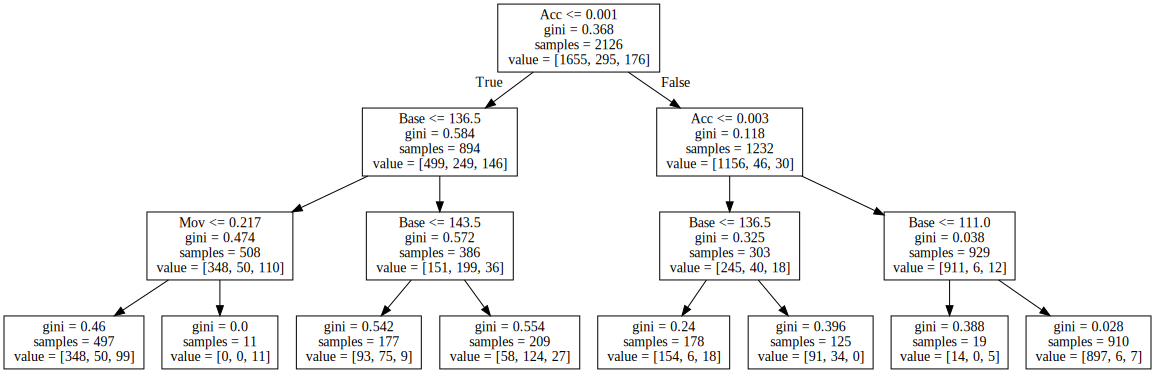

In [182]:
# O con la librería graphviz
import graphviz 

# Export_graphviz
dot_data = tree.export_graphviz(arbol, 
                                out_file=None, 
                                feature_names= ['Base', 'Acc', 'Mov']) 
graph = graphviz.Source(dot_data) 
graph

## 0405 Realizamos una predicción
Una vez el modelo está entrenado (definido) podemos pasarle datos para obtener las prediciones correspondientes de la variable objetivo. 

Para esto utilizamos el método .[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict).

In [183]:
# Predicción
prediccion = arbol.predict(df_resumen[['Base', 'Acc', 'Mov']])
prediccion

array([1., 1., 1., ..., 1., 1., 1.])

In [184]:
# Cómo de buena es la predicción?
from sklearn.metrics import accuracy_score
accuracy_score(df_resumen['Salud Feto'], prediccion)

0.8146754468485419

# 05 EJERCICIO
Entrena un árbol de decisión con todas las variables del set de datos de salud del feto, y evalua si la predicción es mejor o peor que utilizando tres variables (que es lo que acabamos de hacer en la sección anterior).

Hazlo primero manteniendo una profundidad de 3 como en el ejemplo anterior y luego prueba también con 5 y 20.

In [186]:
df.head(2)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0


In [187]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [191]:
# Inicializamos un árbol. Por ahora está vacío. Solo definimos cómo queremos que sea.
arbol_3 = tree.DecisionTreeClassifier(max_depth=3)
arbol_5 = tree.DecisionTreeClassifier(max_depth=5)
arbol_20 = tree.DecisionTreeClassifier(max_depth=20)

In [192]:
# Matrices de datos
cols = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
X = df[cols]
y = df['fetal_health']

In [193]:
# Entrenamos los árboles inicializados a partir de los datos que le pasemos con .fit()
arbol_3 = arbol_3.fit(X = X, y = y)
arbol_5 = arbol_5.fit(X = X, y = y)
arbol_20 = arbol_20.fit(X = X, y = y)

In [199]:
# Podemos visualizar la estructura
print(tree.export_text(arbol_3, 
                       feature_names=list(X.columns)))

|--- mean_value_of_short_term_variability <= 0.55
|   |--- percentage_of_time_with_abnormal_long_term_variability <= 68.50
|   |   |--- abnormal_short_term_variability <= 59.50
|   |   |   |--- class: 1.0
|   |   |--- abnormal_short_term_variability >  59.50
|   |   |   |--- class: 2.0
|   |--- percentage_of_time_with_abnormal_long_term_variability >  68.50
|   |   |--- uterine_contractions <= 0.00
|   |   |   |--- class: 3.0
|   |   |--- uterine_contractions >  0.00
|   |   |   |--- class: 1.0
|--- mean_value_of_short_term_variability >  0.55
|   |--- histogram_mean <= 107.50
|   |   |--- histogram_max <= 220.50
|   |   |   |--- class: 3.0
|   |   |--- histogram_max >  220.50
|   |   |   |--- class: 1.0
|   |--- histogram_mean >  107.50
|   |   |--- percentage_of_time_with_abnormal_long_term_variability <= 6.50
|   |   |   |--- class: 1.0
|   |   |--- percentage_of_time_with_abnormal_long_term_variability >  6.50
|   |   |   |--- class: 1.0



In [198]:
# Podemos visualizar la estructura
print(tree.export_text(arbol_5, 
                       feature_names=list(X.columns)))

|--- mean_value_of_short_term_variability <= 0.55
|   |--- percentage_of_time_with_abnormal_long_term_variability <= 68.50
|   |   |--- abnormal_short_term_variability <= 59.50
|   |   |   |--- percentage_of_time_with_abnormal_long_term_variability <= 61.00
|   |   |   |   |--- histogram_variance <= 4.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- histogram_variance >  4.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- percentage_of_time_with_abnormal_long_term_variability >  61.00
|   |   |   |   |--- class: 2.0
|   |   |--- abnormal_short_term_variability >  59.50
|   |   |   |--- abnormal_short_term_variability <= 79.50
|   |   |   |   |--- percentage_of_time_with_abnormal_long_term_variability <= 7.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- percentage_of_time_with_abnormal_long_term_variability >  7.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- abnormal_short_term_variability >  79.50
|   |   |   |   |--- uterine_contractions <= 0.00
|

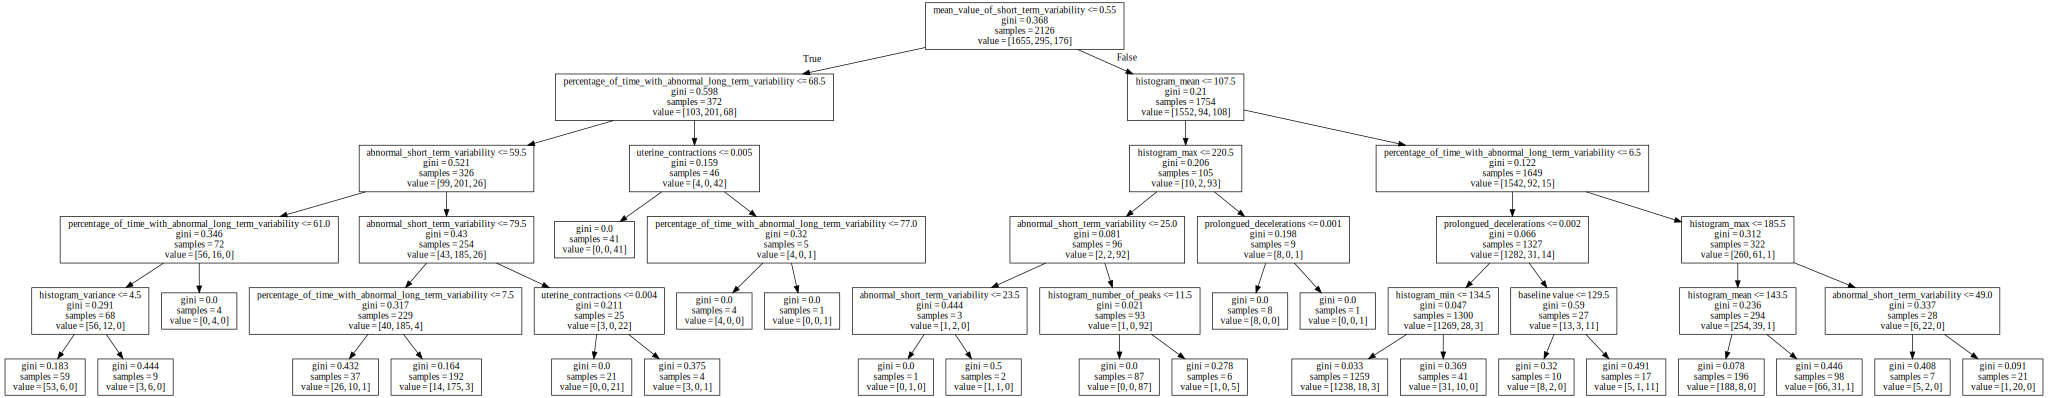

In [200]:
import graphviz 
dot_data = tree.export_graphviz(arbol_5, 
                                out_file=None, 
                                feature_names=list(X.columns)) 
graph = graphviz.Source(dot_data) 
graph

In [196]:
# Predicción
prediccion_3 = arbol_3.predict(X)
prediccion_5 = arbol_5.predict(X)
prediccion_20 = arbol_20.predict(X)

In [197]:
# Precisión de la predicción
print('Precisión de arbol depth=3 es de ',accuracy_score(y, prediccion_3))
print('Precisión de arbol depth=5 es de ',accuracy_score(y, prediccion_5))
print('Precisión de arbol depth=20 es de ',accuracy_score(y, prediccion_20))

Precisión de arbol depth=3 es de  0.9068673565380997
Precisión de arbol depth=5 es de  0.9426152398871119
Precisión de arbol depth=20 es de  0.9990592662276576
